In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
from google.colab import files
 
 
uploaded = files.upload()

Saving us_holiday.csv to us_holiday (3).csv
Saving train.csv to train (1).csv


In [15]:
import io
 
df_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
#print(df)df_train = pd.read_csv('/Users/nikomii/Documents/CZ4041/data_set/train.csv')
df_train['date'] = pd.to_datetime(df_train['date'])


df_holiday = pd.read_csv(io.BytesIO(uploaded['us_holiday.csv']))

df_holiday['Date'] = pd.to_datetime(df_holiday['Date'])
df_holiday.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    66 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 656.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


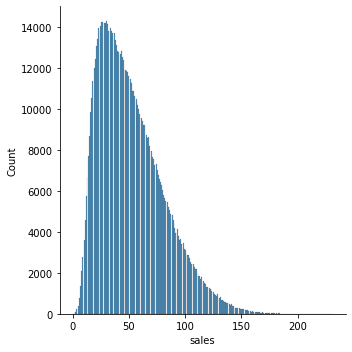

In [ ]:
data_sales = df_train['sales']

# Generate histogram/distribution plot
sns.displot(data_sales)

plt.show()

In [ ]:
data_sales.describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

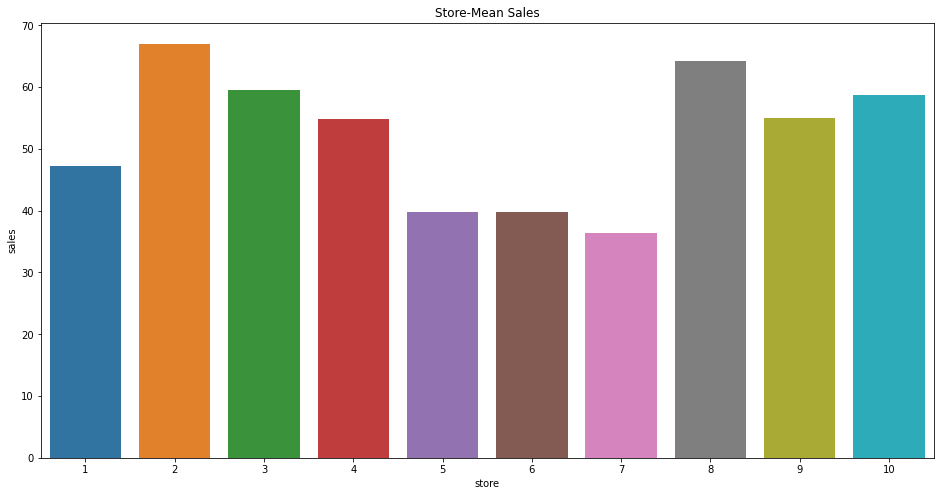

In [ ]:
cat=df_train[["store", "sales"]].groupby(['store'], as_index=False).mean().sort_values(by='sales', ascending=False)
plt.figure(figsize=(16,8))
plt.title("Store-Mean Sales")

sns.barplot(x='store', y='sales', data=cat)


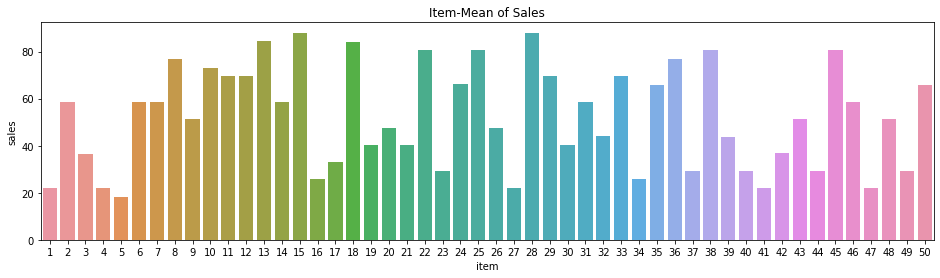

In [ ]:
cat_item=df_train[["item", "sales"]].groupby(['item'], as_index=False).mean().sort_values(by='sales', ascending=False)
plt.figure(figsize=(16,4))
plt.title("Item-Mean of Sales")

sns.barplot(x='item', y='sales', data=cat_item)

In [ ]:
df_heat = df_train.copy()[['store','item','sales']]
df_heat.head()

,store,item,sales
0,1,1,13
1,1,1,11
2,1,1,14
3,1,1,13
4,1,1,10


In [ ]:
# Using DataFrame.agg() Method.
df_heat = df_heat.groupby(['store','item']).mean()
# df_byStore = df_heat.groupby(['store']).sum()
# df_heat = df_heat.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_heat = df_heat.unstack(level=0)
df_heat.head()

sales                                                         \
store         1          2          3          4          5          6    
item                                                                      
1      19.971522  28.173604  25.070099  22.938664  16.739321  16.717963   
2      53.148959  75.316539  66.804491  61.715225  44.488499  44.533954   
3      33.208105  46.992333  41.771084  38.548193  27.835706  27.811062   
4      19.956188  28.234940  25.116101  23.086528  16.776561  16.754107   
5      16.612815  23.540526  20.857612  19.525192  14.086528  13.893209   

                                                   
store         7          8          9          10  
item                                               
1      15.159365  26.983571  23.325849  24.736035  
2      40.717963  71.656627  61.792442  65.566813  
3      25.531216  45.076123  38.535049  41.113363  
4      15.358160  26.948521  23.150055  24.721249  
5      12.733844  22.427711  19.272180  20.637459

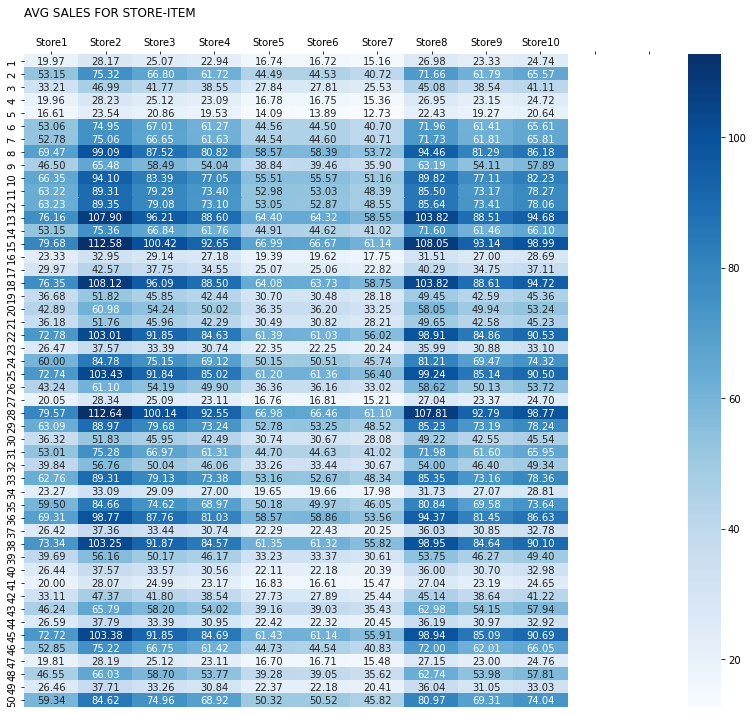

In [ ]:
fig, ax = plt.subplots(figsize=(14, 12))
# plot heatmap
sns.heatmap(df_heat, cmap="Blues",annot=True, fmt=".2f")

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Store1', 'Store2', 'Store3', 'Store4', 'Store5', 'Store6',
                'Store7', 'Store8', 'Store9', 'Store10']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'Avg sales for Store-Item\n'.upper()
plt.title(title, loc='left')
plt.show()


In [ ]:
df_heat = df_train.copy()[['store','item','sales']]
df_heat = df_heat.groupby(['store','item']).sum().div(df_heat.groupby(['item']).sum())
df_heat = df_heat.drop('store', 1)
# df_byStore = df_heat.groupby(['store']).sum()
# df_heat = df_heat.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_heat = df_heat.unstack(level=0)

df_heat.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


sales                                                              \
store        1         2         3         4         5         6         7    
item                                                                          
1      0.090856  0.128169  0.114050  0.104354  0.076152  0.076054  0.068964   
2      0.090738  0.128583  0.114051  0.105363  0.075952  0.076030  0.069515   
3      0.090628  0.128246  0.113997  0.105202  0.075966  0.075899  0.069677   
4      0.090668  0.128281  0.114111  0.104890  0.076222  0.076120  0.069777   
5      0.090490  0.128225  0.113612  0.106354  0.076729  0.075676  0.069361   

                                     
store        8         9         10  
item                                 
1      0.122755  0.106115  0.112531  
2      0.122335  0.105494  0.111938  
3      0.123017  0.105166  0.112202  
4      0.122436  0.105179  0.112317  
5      0.122164  0.104976  0.112412

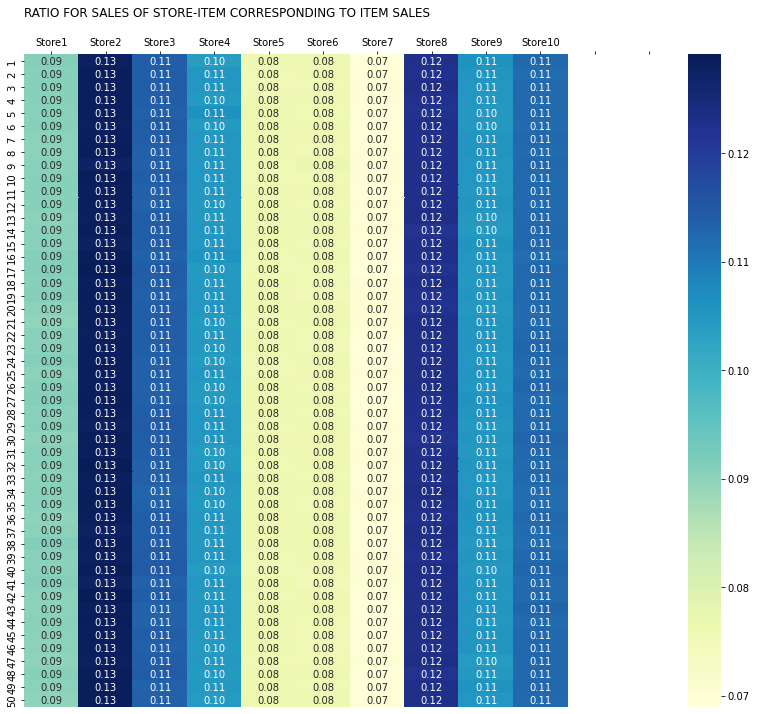

In [ ]:
fig, ax = plt.subplots(figsize=(14, 12))
# plot heatmap
sns.heatmap(df_heat, cmap="YlGnBu",annot=True, fmt=".2f")

# xticks
ax.xaxis.tick_top()
xticks_labels = ['Store1', 'Store2', 'Store3', 'Store4', 'Store5', 'Store6',
                'Store7', 'Store8', 'Store9', 'Store10']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'ratio for sales of store-item corresponding to item sales\n'.upper()
plt.title(title, loc='left')
plt.show()


# Time Series EDA

In [ ]:
cat_dateSales=df_train.copy()[["date", "sales"]]

# set date as the index and drop the date column
cat_dateSales.index = cat_dateSales.date
# resample the dataframe every 1 day (D) and sum ovr each day
cat_dateSales = cat_dateSales.resample('M').sum()
# eliminate the rows where the sum is 0 (i.e. rows which were not in the original dataframe)

cat_dateSales.head()

,sales
date,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242


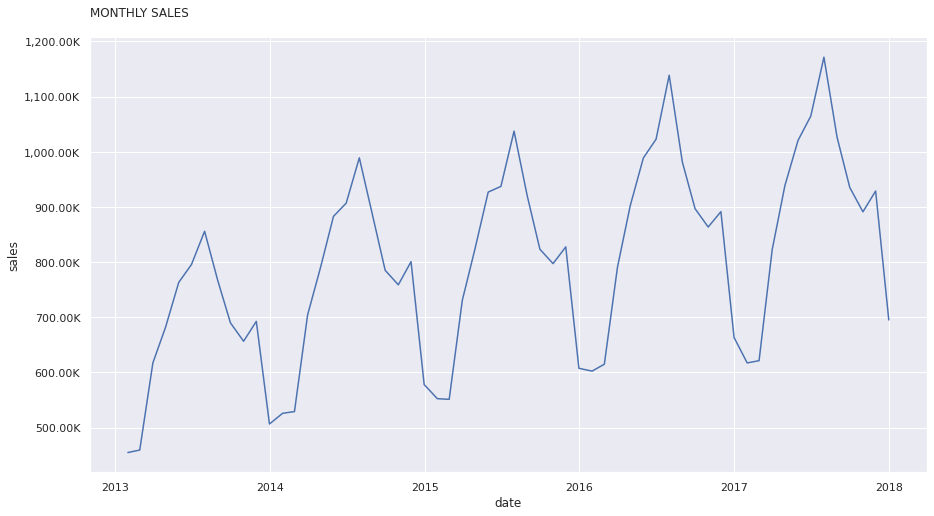

In [ ]:
sns.set(style="darkgrid")    
fig, ax = plt.subplots(figsize=(15, 8))    
palette = sns.color_palette("bright", 4)
g = sns.lineplot(ax=ax, x = 'date', y = 'sales',data = cat_dateSales, palette= palette)
# g.legend(bbox_to_anchor=(1, 1), ncol=1)
# g.set(xlim = (50000,250000))
ylabels = ['{:,.2f}'.format(y) + 'K' for y in g.get_yticks()/1000]
g.set_yticklabels(ylabels)

title = 'Monthly sales\n'.upper()
plt.title(title, loc='left')
plt.show()

In [ ]:
cat_dateSales=df_train.copy()[['date','store','sales']]
cat_dateSales = cat_dateSales.groupby(['store', pd.Grouper(key='date', freq='M')])['sales'].sum()
# cat_dateSales = cat_dateSales.unstack(level=0)
cat_dateSales = cat_dateSales.reset_index()
cat_dateSales.head()

,store,date,sales
0,1,2013-01-31,41077
1,1,2013-02-28,41306
2,1,2013-03-31,55827
3,1,2013-04-30,61523
4,1,2013-05-31,69272


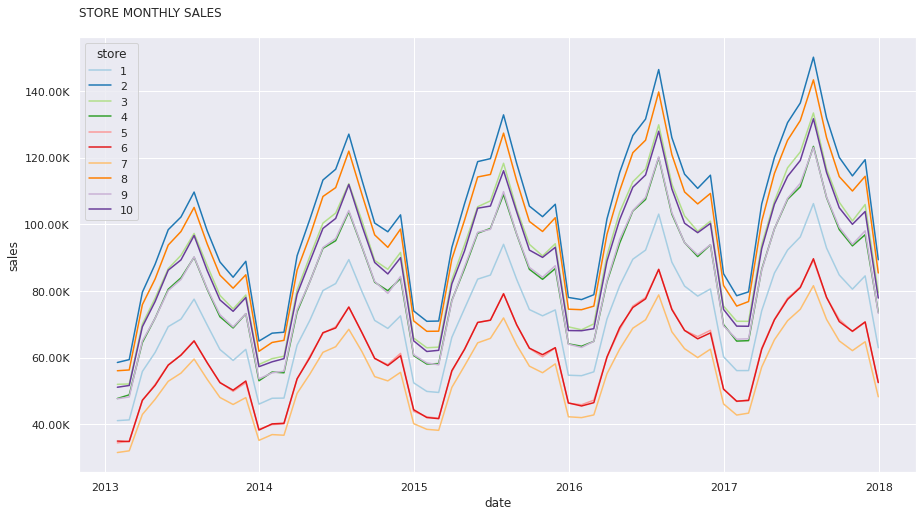

In [ ]:
sns.set(style="darkgrid")    
fig, ax = plt.subplots(figsize=(15, 8))    
palette = sns.color_palette("Paired", 10)
g = sns.lineplot(ax=ax, x = 'date', y = 'sales',data = cat_dateSales, palette=palette, hue="store")
ylabels = ['{:,.2f}'.format(y) + 'K' for y in g.get_yticks()/1000]
g.set_yticklabels(ylabels)

title = 'Store monthly sales\n'.upper()
plt.title(title, loc='left')
plt.show()

In [ ]:
cat_dateSales=df_train.copy()[['date','item','sales']]
cat_dateSales = cat_dateSales.groupby(['item', pd.Grouper(key='date', freq='M')])['sales'].sum()
# cat_dateSales = cat_dateSales.unstack(level=0)
cat_dateSales = cat_dateSales.reset_index()
cat_dateSales.head()

,item,date,sales
0,1,2013-01-31,3794
1,1,2013-02-28,3863
2,1,2013-03-31,5190
3,1,2013-04-30,5783
4,1,2013-05-31,6298


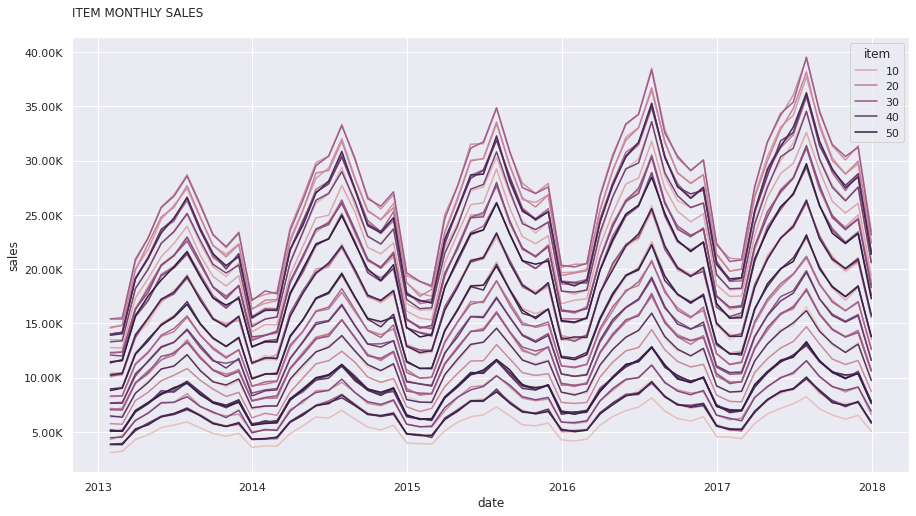

In [ ]:
sns.set(style="darkgrid")    
fig, ax = plt.subplots(figsize=(15, 8))    

g = sns.lineplot(ax=ax, x = 'date', y = 'sales',data = cat_dateSales, hue="item")
ylabels = ['{:,.2f}'.format(y) + 'K' for y in g.get_yticks()/1000]
g.set_yticklabels(ylabels)

title = 'Item monthly sales\n'.upper()
plt.title(title, loc='left')
plt.show()

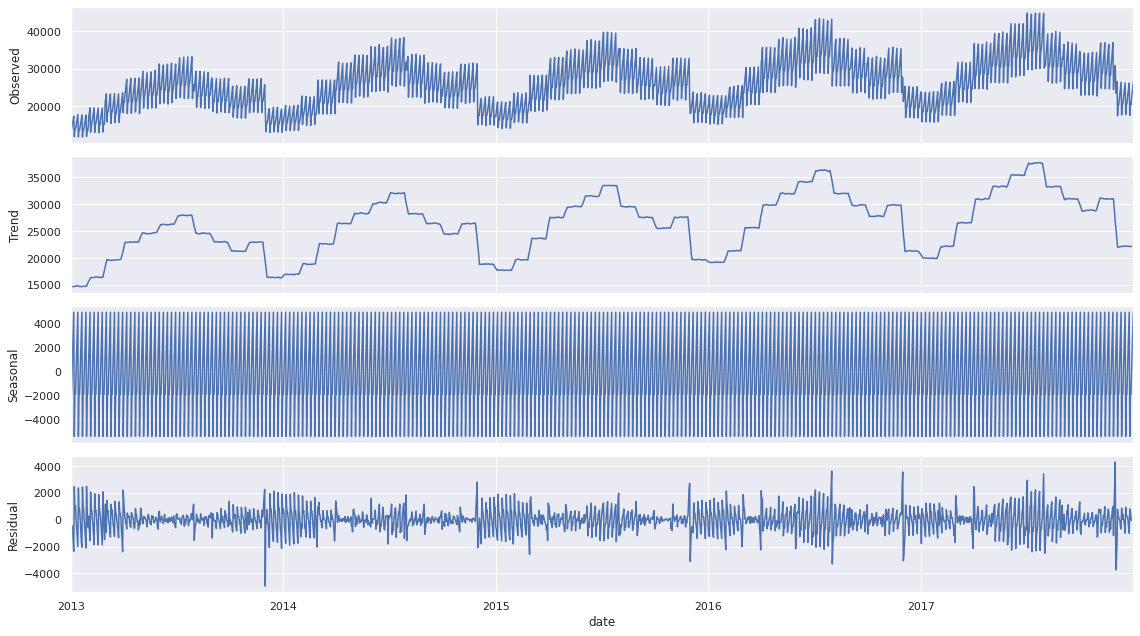

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

cat_dateSales=df_train.copy()[["date", "sales"]]

# set date as the index and drop the date column
cat_dateSales.index = cat_dateSales.date
# resample the dataframe every 1 day (D) and sum ovr each day
cat_dateSales = cat_dateSales.resample('D').sum()
# eliminate the rows where the sum is 0 (i.e. rows which were not in the original dataframe)
result = seasonal_decompose(cat_dateSales, model='additive')
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()


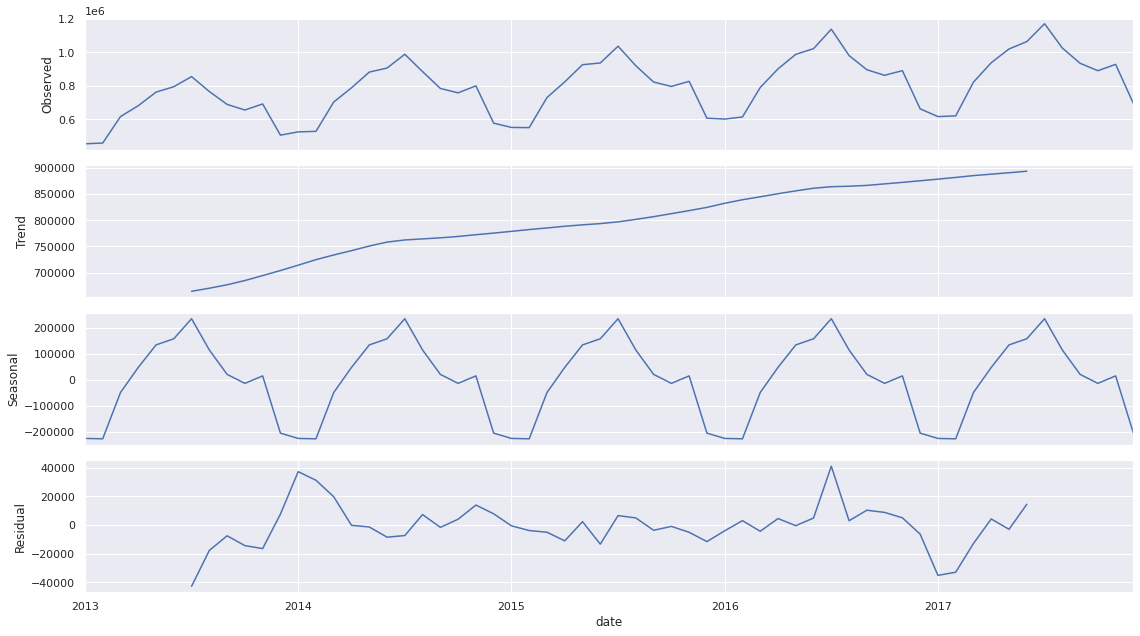

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

cat_dateSales=df_train.copy()[["date", "sales"]]

# set date as the index and drop the date column
cat_dateSales.index = cat_dateSales.date
# resample the dataframe every 1 day (D) and sum ovr each day
cat_dateSales = cat_dateSales.resample('M').sum()
# eliminate the rows where the sum is 0 (i.e. rows which were not in the original dataframe)
result = seasonal_decompose(cat_dateSales, model='additive')
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()


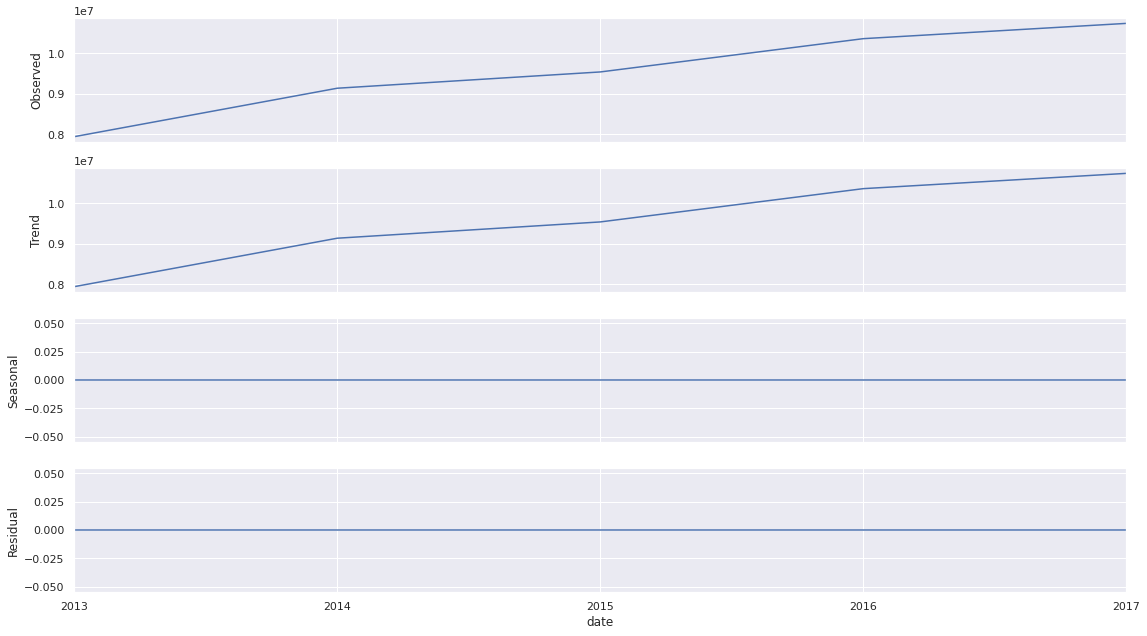

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

cat_dateSales=df_train.copy()[["date", "sales"]]

# set date as the index and drop the date column
cat_dateSales.index = cat_dateSales.date
# resample the dataframe every 1 day (D) and sum ovr each day
cat_dateSales = cat_dateSales.resample('Y').sum()
# eliminate the rows where the sum is 0 (i.e. rows which were not in the original dataframe)
result = seasonal_decompose(cat_dateSales, model='additive')
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()


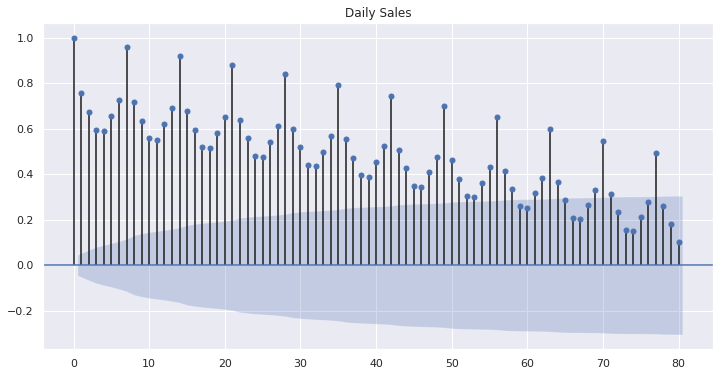

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
cat_dateSales=df_train.copy()[["date", "sales"]]

# set date as the index and drop the date column
cat_dateSales.index = cat_dateSales.date
# resample the dataframe every 1 day (D) and sum ovr each day
cat_dateSales = cat_dateSales.resample('D').sum()
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(cat_dateSales, title='Daily Sales', ax=ax,lags=80)
plt.show()

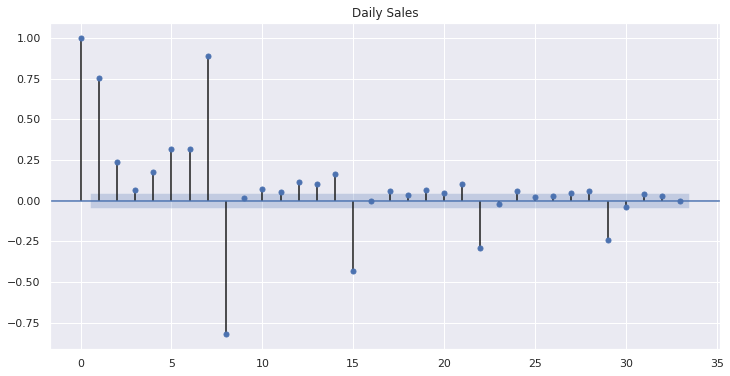

In [ ]:
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(cat_dateSales, title='Daily Sales', ax=ax)
plt.show()

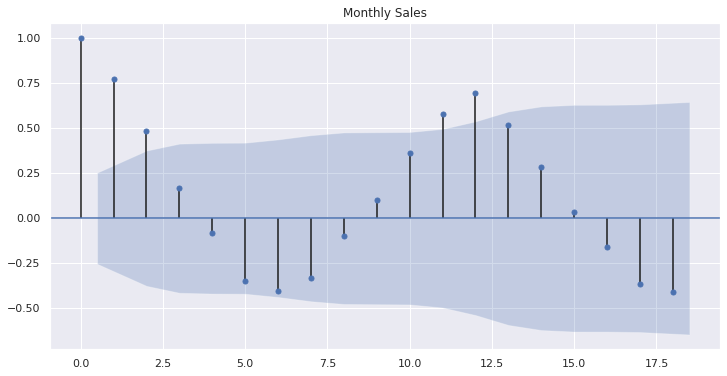

In [ ]:
cat_dateSales=df_train.copy()[["date", "sales"]]

# set date as the index and drop the date column
cat_dateSales.index = cat_dateSales.date
# resample the dataframe every 1 day (D) and sum ovr each day
cat_dateSales = cat_dateSales.resample('M').sum()
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(cat_dateSales, title='Monthly Sales', ax=ax)
plt.show()

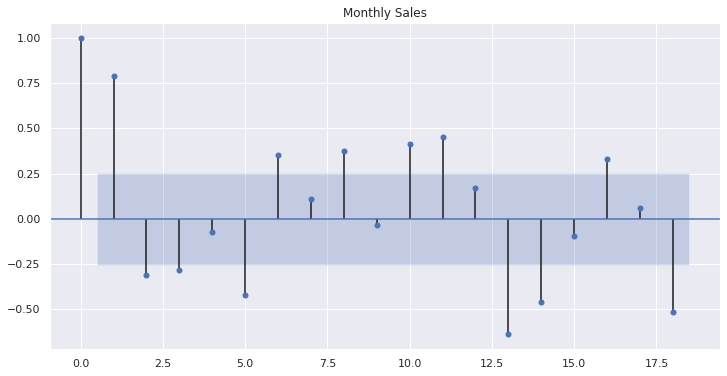

In [ ]:
N, M = 12, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(cat_dateSales, title='Monthly Sales', ax=ax, lags = 18)
plt.show()

# **FEATURE ENGINEERING**


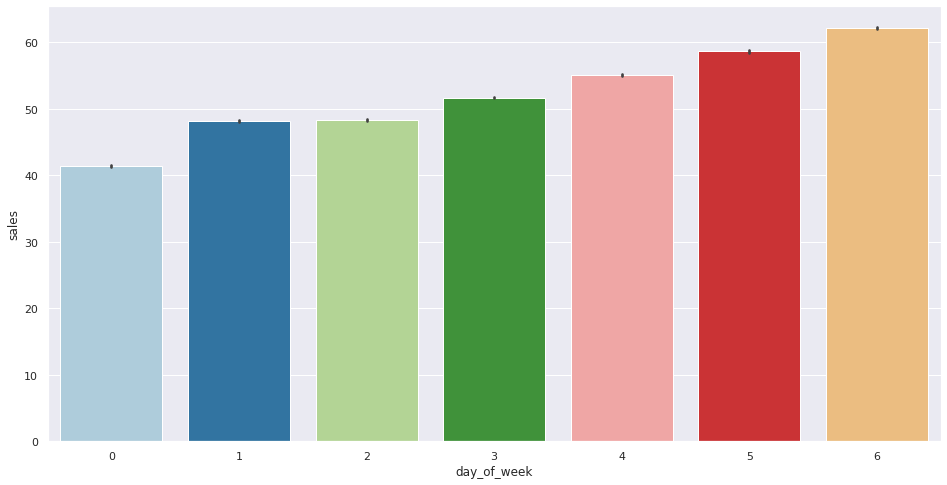

In [6]:
dateFeature=df_train.copy()[["date", "sales"]]
dateFeature.index = dateFeature.date
dateFeature['day_of_week'] = dateFeature.index.dayofweek

palette = sns.color_palette("Paired")
sns.set(rc={"figure.figsize":(16, 8)})
ax = sns.barplot(data = dateFeature, x=dateFeature["day_of_week"], y = dateFeature["sales"],palette = palette)
plt.show()

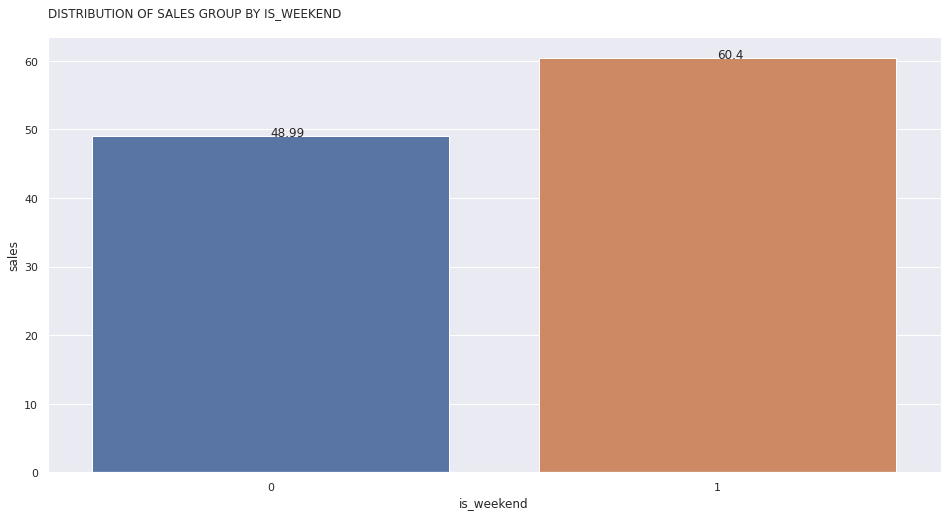

In [26]:
dateFeature=df_train.copy()[["date", "sales"]]
dateFeature.index = dateFeature.date
dateFeature['day_of_week'] = dateFeature.index.dayofweek
dateFeature['is_weekend'] = dateFeature.apply(lambda features : 1 if ((features['day_of_week'] == 5)|(features['day_of_week'] == 6)) else 0, axis=1)

dateFeature = dateFeature.groupby(['is_weekend'], as_index = False)['sales'].mean()
y=dateFeature['sales']
sns.set(rc={"figure.figsize":(16, 8)})
ax = sns.barplot(data = dateFeature, x=dateFeature["is_weekend"], y = dateFeature["sales"])
title = 'Distribution of sales group by is_weekend\n'.upper()
plt.title(title, loc='left')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value, 2)))
plt.show()


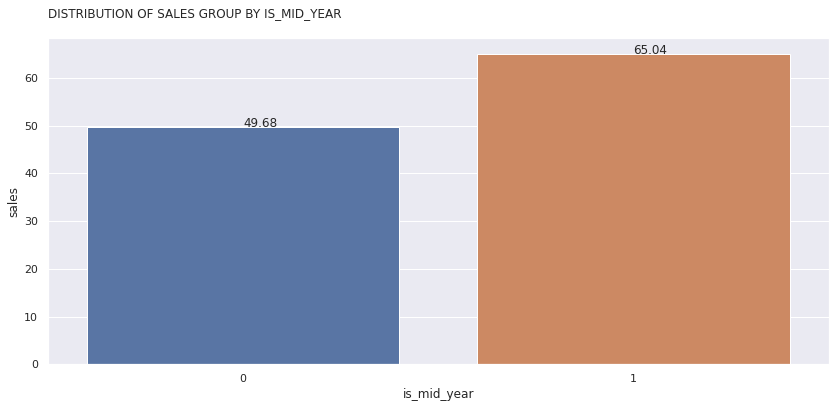

In [7]:
dateFeature=df_train.copy()[["date", "sales"]]
dateFeature.index = dateFeature.date
dateFeature['day_of_week'] = dateFeature.index.dayofweek
dateFeature['day'] = dateFeature.index.day
dateFeature['month'] = dateFeature.index.month
dateFeature['is_mid_year'] = dateFeature.apply(lambda features : 1 if ((features['month'] == 6)|(features['month'] == 7)) else 0, axis=1)

dateFeature = dateFeature.groupby(['is_mid_year'], as_index = False)['sales'].mean()
y=dateFeature['sales']
sns.set(rc={"figure.figsize":(14, 6)})
ax = sns.barplot(data = dateFeature, x=dateFeature["is_mid_year"], y = dateFeature["sales"])
title = 'Distribution of sales group by is_mid_year\n'.upper()
plt.title(title, loc='left')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value, 2)))
plt.show()

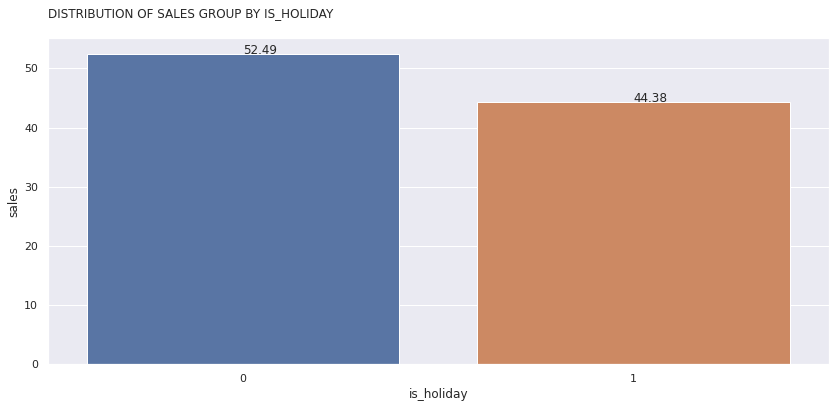

In [16]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
#Date related features
dateFeature=df_train.copy()[["date", "sales"]]
dateFeature.index = dateFeature.date



dateFeature['is_holiday'] = dateFeature.index.isin(df_holiday['Date'])
dateFeature['is_holiday'] = dateFeature.apply(lambda features : 1 if (features['is_holiday']) else 0, axis=1)

dateFeature = dateFeature.groupby(['is_holiday'], as_index = False)['sales'].mean()

y=dateFeature['sales']
sns.set(rc={"figure.figsize":(14, 6)})
ax = sns.barplot(data = dateFeature, x=dateFeature["is_holiday"], y = dateFeature["sales"])
title = 'Distribution of sales group by is_holiday\n'.upper()

plt.title(title, loc='left')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value, 2)))
plt.show()
